<a href="https://colab.research.google.com/github/yojoe101/test/blob/master/%E3%80%8Cregerssion_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城镇非零售业商用土地比例

CHAS：是否邻近查尔斯河，1是邻近，0是不邻近

NOX：一氧化氮浓度（千万分之一）

RM：住宅的平均房间数

AGE：自住且建于1940年前的房屋比例

DIS：到5个波士顿就业中心的加权距离

RAD：到高速公路的便捷度指数

TAX：每万元的房产税率

PTRATIO：城镇学生教师比例

B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例

LSTAT：低收入人群比例

ans：自住房中位数价格，单位是千元

In [2]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
df["target"] = boston["target"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
from sklearn.model_selection import train_test_split
# [x_train, x_test, y_train, y_test]
x_train, x_test, y_train, y_test = train_test_split(boston["data"], boston["target"], test_size=0.1)
x_train

array([[1.09600e-02, 5.50000e+01, 2.25000e+00, ..., 1.53000e+01,
        3.94720e+02, 8.23000e+00],
       [6.21100e-02, 4.00000e+01, 1.25000e+00, ..., 1.97000e+01,
        3.96900e+02, 5.98000e+00],
       [4.75237e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        5.09200e+01, 1.81300e+01],
       ...,
       [7.67202e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.93100e+02, 1.99200e+01],
       [4.35710e-01, 0.00000e+00, 1.05900e+01, ..., 1.86000e+01,
        3.96900e+02, 2.30900e+01],
       [6.71910e-01, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.76880e+02, 1.48100e+01]])

In [4]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=4)
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

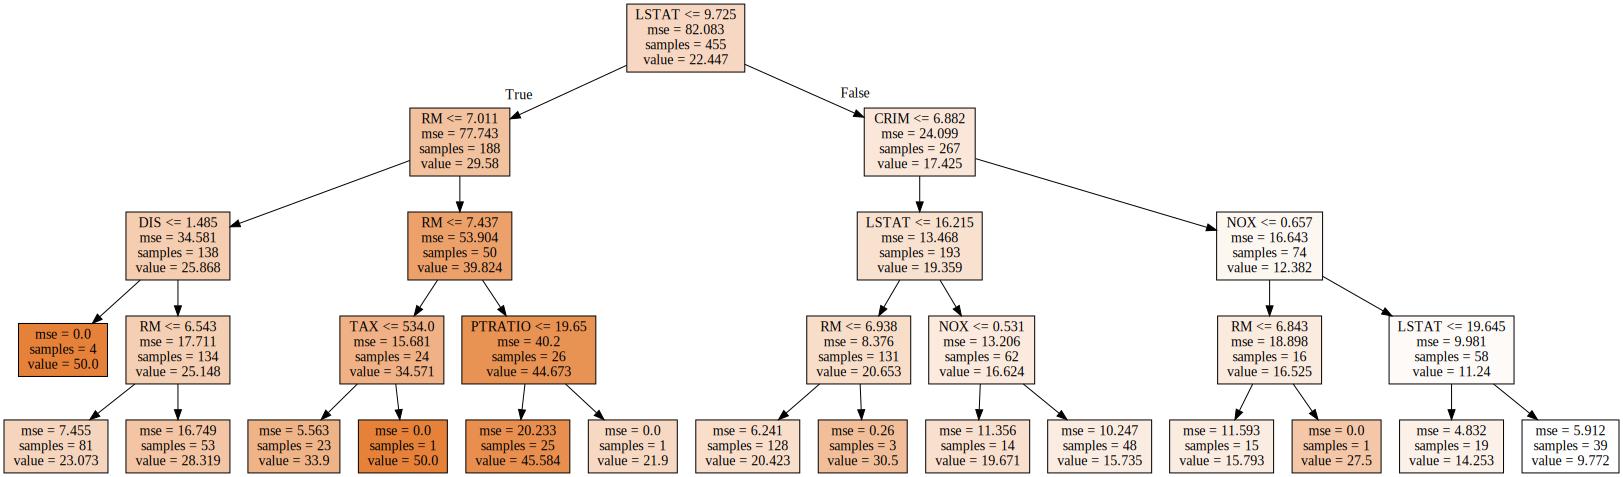

In [5]:
import graphviz
from sklearn.tree import export_graphviz
g = export_graphviz(reg, 
           feature_names=boston["feature_names"],
           filled=True)
graphviz.Source(g)

In [7]:
pre = reg.predict(x_test)
print(list(y_test))
print(list(pre))

[13.3, 14.6, 31.5, 37.2, 13.1, 13.1, 26.2, 7.2, 23.1, 18.3, 24.0, 18.1, 50.0, 25.0, 32.0, 24.7, 33.4, 46.0, 36.4, 20.1, 17.8, 11.9, 28.0, 13.4, 18.6, 18.2, 31.6, 8.7, 13.6, 22.2, 19.1, 12.6, 15.6, 19.3, 21.4, 27.9, 13.8, 32.2, 19.6, 33.1, 50.0, 10.9, 19.7, 16.8, 19.5, 15.2, 24.3, 25.0, 23.8, 45.4, 31.5]
[15.73541666666666, 15.793333333333335, 28.31886792452831, 28.31886792452831, 15.73541666666666, 20.422656249999992, 28.31886792452831, 9.771794871794873, 15.793333333333335, 20.422656249999992, 28.31886792452831, 15.73541666666666, 45.583999999999996, 28.31886792452831, 28.31886792452831, 23.072839506172837, 28.31886792452831, 45.583999999999996, 33.9, 15.793333333333335, 15.73541666666666, 23.072839506172837, 28.31886792452831, 15.73541666666666, 23.072839506172837, 20.422656249999992, 33.9, 9.771794871794873, 15.73541666666666, 23.072839506172837, 15.793333333333335, 14.252631578947366, 15.73541666666666, 20.422656249999992, 23.072839506172837, 14.252631578947366, 9.771794871794873, 